### ДЗ - задача поиска и индентефикации лиц.
#### * Задача поиска ЛИЦ и определить координаты зрачка.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Каскады Хаара

In [2]:
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')

In [4]:
cap = cv2.VideoCapture(0)
while True:
    ret, img = cap.read()
    gray  = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x, y, w, h) in faces:
        cv2.rectangle(img, (x, y), (x+w, y+h), (255,0,0),2)
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray, 1.3, 5)
        for (ex, ey, ew, eh) in eyes:
            cv2.rectangle(roi_color, (ex, ey), (ex + ew, ey + eh), (0,255,0), 2)
            
    cv2.imshow('img', img)
    k = cv2.waitKey(30) & 0xff
    if k == 27:
        break
        
cap.release()
cv2.destroyAllWindows()

In [3]:
img = cv2.imread('cv2-12.jpg')
gray  = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#Ищем лица
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
#Мы хотим искать глаза внутри лица
for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x+w, y+h), (255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray, 1.3, 5)
    for (ex, ey, ew, eh) in eyes:
        cv2.rectangle(roi_color, (ex, ey), (ex + ew, ey + eh), (0,255,0), 2)

In [4]:
x, y, w, h

(28, 48, 119, 119)

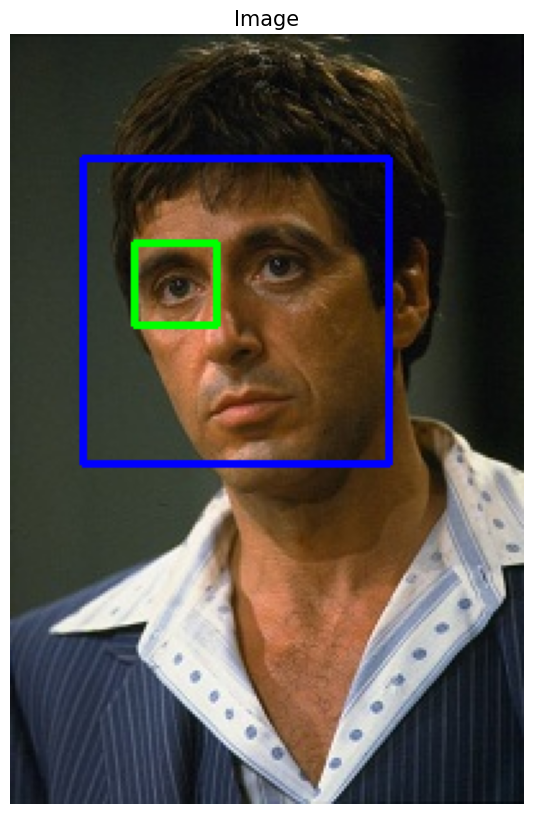

In [5]:
plt.rcParams['figure.figsize'] = 18,10
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Image', fontsize=15)
plt.axis('off');

In [6]:
img = cv2.imread('cv2-13.jpg')
gray  = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#Ищем лица
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
#Мы хотим искать глаза внутри лица
for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x+w, y+h), (255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray, 1.3, 5)
    for (ex, ey, ew, eh) in eyes:
        cv2.rectangle(roi_color, (ex, ey), (ex + ew, ey + eh), (0,255,0), 2)
    

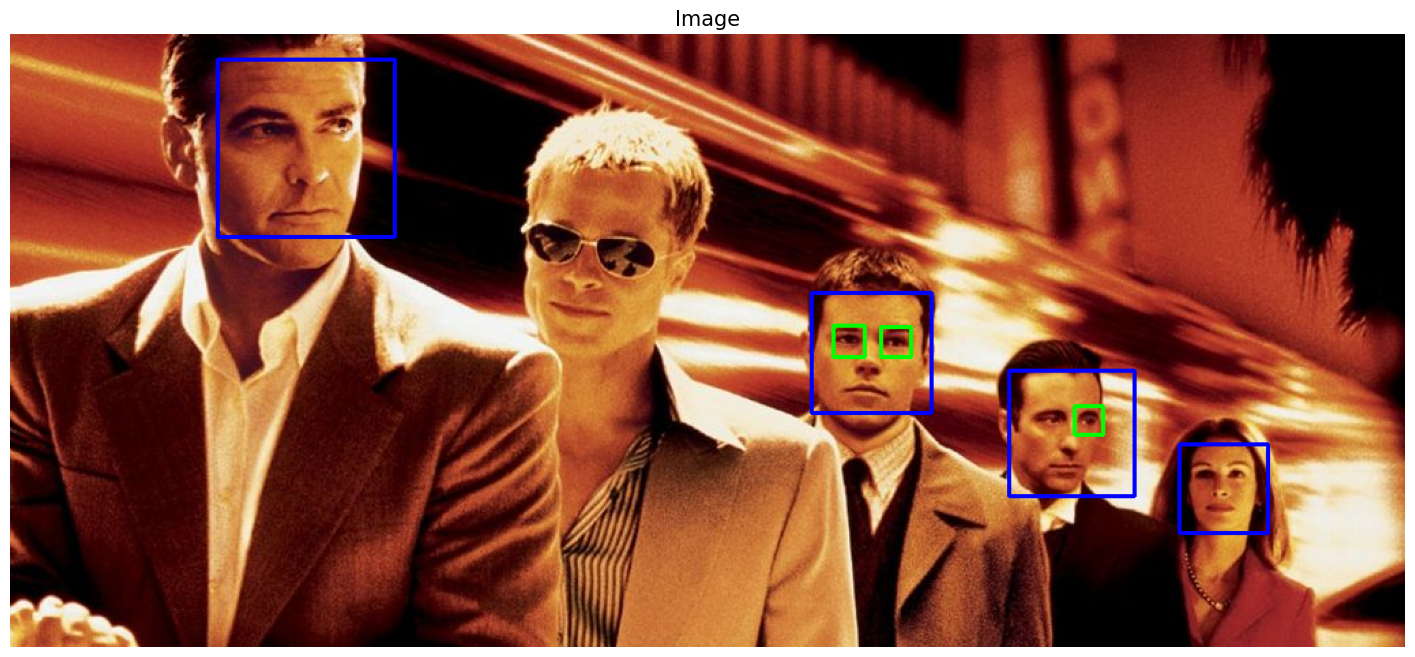

In [7]:
plt.rcParams['figure.figsize'] = 18,10
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Image', fontsize=15)
plt.axis('off');

## DLIB

In [8]:
from imutils import face_utils
import imutils
import dlib

In [9]:
def rect_to_bb(rect):
    #Принимает на вход объект dlib, содержащий координаты лиц и возвращает кортеж
    x = rect.left()
    y = rect.top()
    w = rect.right() - x
    h = rect.bottom() - y


    return (x, y, w, h)

In [10]:
def shape_to_np(shape, dtype="int"):

    # возвращает координаты элементов лица
    coords = np.zeros((68, 2), dtype=dtype)
    for i in range(0, 68):
        coords[i] = (shape.part(i).x, shape.part(i).y)

    return coords

In [11]:
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor('shape_predictor_68_face_landmarks.dat')

In [12]:
cap = cv2.VideoCapture(0)
# fourcc = cv2.VideoWriter_fourcc(*'XVID')
# out = cv2.VideoWriter('output.avi',fourcc, 10.0, (640,480))
while True:
    ret, img = cap.read()
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    dets = detector(gray, 1)
    for (i, rect) in enumerate(dets):

        shape = predictor(img, rect)
        shape = face_utils.shape_to_np(shape)

        # Очертание лица
        (x, y, w, h) = face_utils.rect_to_bb(rect)
        cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

        # Нумировка лица
        cv2.putText(img, "Face #{}".format(i + 1), (x - 10, y - 10),
            cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

        #Прорисовка элементов лица
        for (x, y) in shape:
            cv2.circle(img, (x, y), 2, (0, 0, 255), -1)

    cv2.imshow('img', img)
    k = cv2.waitKey(30) & 0xff
    if k == 27:
        break
cap.release()
# out.release()
cv2.destroyAllWindows()

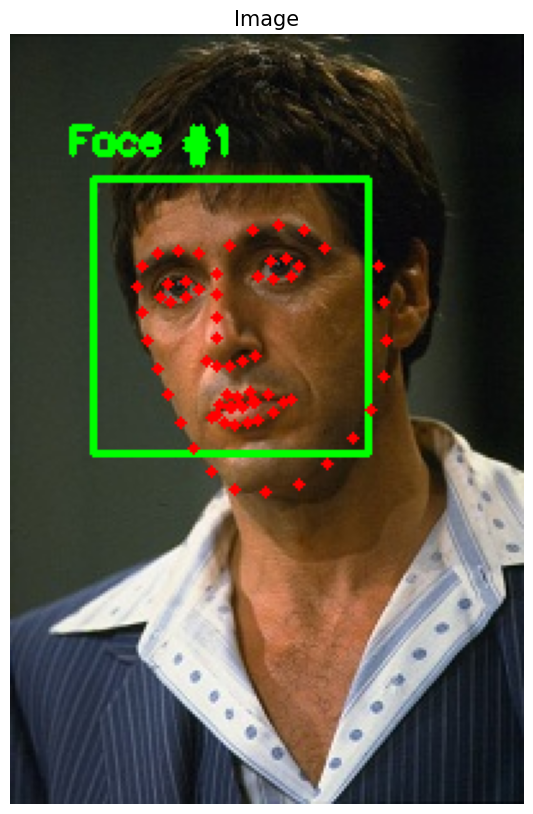

In [12]:
img = cv2.imread('cv2-12.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
dets = detector(gray, 1)
for (i, rect) in enumerate(dets):

    shape = predictor(img, rect)
    shape = face_utils.shape_to_np(shape)
    # Очертание лица
    (x, y, w, h) = face_utils.rect_to_bb(rect)
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # Нумировка лица
    cv2.putText(img, "Face #{}".format(i + 1), (x - 10, y - 10),
        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    #Прорисовка элементов лица
    for (x, y) in shape:
        cv2.circle(img, (x, y), 2, (0, 0, 255), -1)

plt.rcParams['figure.figsize'] = 18,10
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Image', fontsize=15)
plt.axis('off');

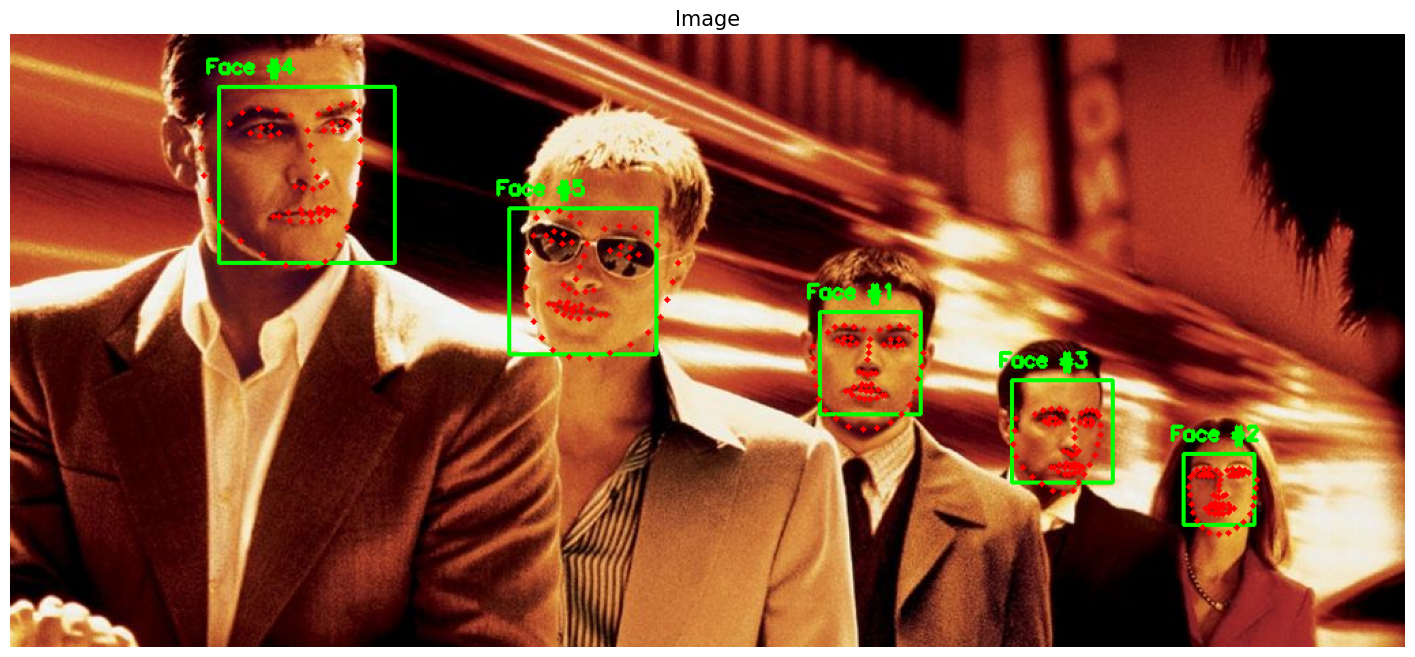

In [13]:
img = cv2.imread('cv2-13.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
dets = detector(gray, 1)
for (i, rect) in enumerate(dets):

    shape = predictor(img, rect)
    shape = face_utils.shape_to_np(shape)
    # Очертание лица
    (x, y, w, h) = face_utils.rect_to_bb(rect)
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # Нумировка лица
    cv2.putText(img, "Face #{}".format(i + 1), (x - 10, y - 10),
        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    #Прорисовка элементов лица
    for (x, y) in shape:
        cv2.circle(img, (x, y), 2, (0, 0, 255), -1)

plt.rcParams['figure.figsize'] = 18,10
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Image', fontsize=15)
plt.axis('off');

# Определение зрачка

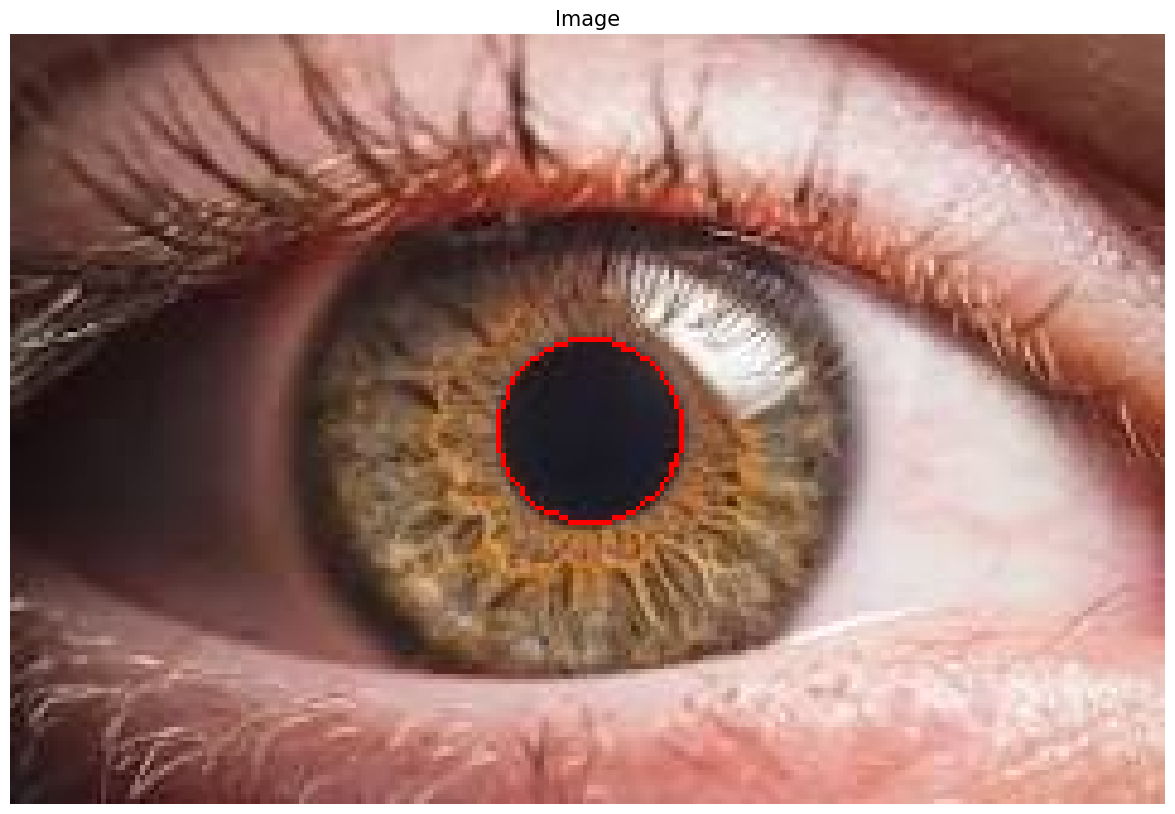

In [15]:
import cv2
from pupil_detectors import Detector2D

detector = Detector2D()

# read image as numpy array from somewhere, e.g. here from a file
img = cv2.imread("pupil_test.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

result = detector.detect(gray)
ellipse = result["ellipse"]

# draw the ellipse outline onto the input image
# note that cv2.ellipse() cannot deal with float values
# also it expects the axes to be semi-axes (half the size)
cv2.ellipse(
   img,
   tuple(int(v) for v in ellipse["center"]),
   tuple(int(v / 2) for v in ellipse["axes"]),
   ellipse["angle"],
   0, 360, # start/end angle for drawing
   (0, 0, 255) # color (BGR): red
)

plt.rcParams['figure.figsize'] = 18,10
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Image', fontsize=15)
plt.axis('off');